# First Try

In [87]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [89]:
data = pd.read_csv('data\\train.csv')

In [90]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

In [91]:
data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [92]:
def init_params():
    W1 = np.random.normal(size=(10, 784)) * np.sqrt(1./(784))
    b1 = np.random.normal(size=(10, 1)) * np.sqrt(1./10)
    W2 = np.random.normal(size=(10, 10)) * np.sqrt(1./20)
    b2 = np.random.normal(size=(10, 1)) * np.sqrt(1./(784))
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [93]:
from tqdm import tqdm

In [94]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    A2 = np.arange(1, 1)
    for i in tqdm(range(iterations)):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
    return W1, b1, W2, b2

In [95]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.19, 500)

100%|██████████| 500/500 [00:21<00:00, 23.42it/s]


In [96]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [1]
Label:  1


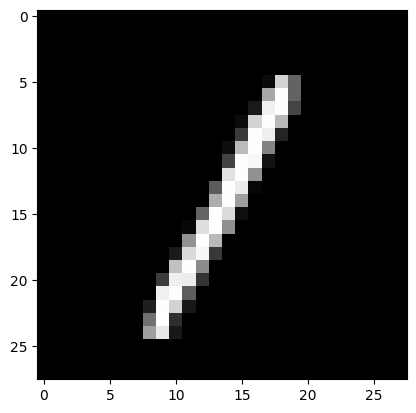

Prediction:  [5]
Label:  5


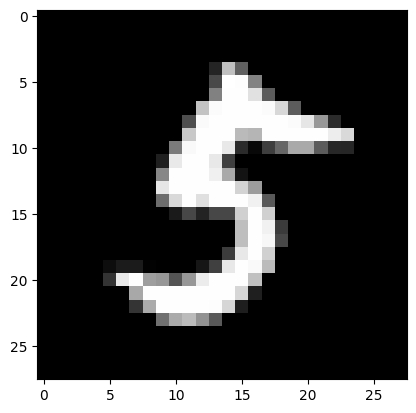

Prediction:  [8]
Label:  8


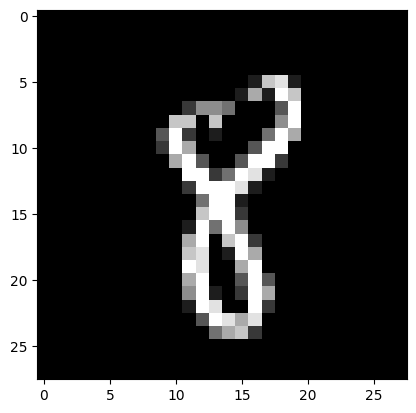

Prediction:  [2]
Label:  2


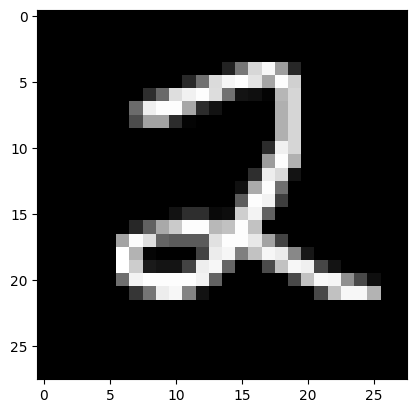

In [100]:
test_prediction(12, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)
test_prediction(0, W1, b1, W2, b2)
test_prediction(47, W1, b1, W2, b2)

In [98]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[8 8 9 7 5 5 3 8 4 8 5 7 3 1 8 3 8 3 0 8 3 2 9 9 2 8 9 1 1 6 0 1 3 5 7 4 9
 0 6 3 1 1 2 9 2 7 7 2 4 4 9 9 5 7 1 7 3 3 5 6 0 7 7 0 7 4 2 4 8 5 9 9 0 6
 3 8 1 1 2 8 8 0 0 8 8 7 2 5 8 9 5 8 6 0 6 8 9 1 5 5 3 0 3 0 3 3 5 2 3 3 7
 1 4 2 1 0 9 5 8 7 4 5 6 6 0 6 0 3 4 1 2 3 0 7 9 9 0 5 5 0 2 3 8 8 5 4 8 2
 1 9 4 6 6 0 1 2 3 0 0 4 7 6 7 4 8 8 2 4 6 8 9 1 8 2 1 4 1 9 4 1 3 0 3 8 6
 7 8 9 7 0 9 2 3 0 1 5 5 8 1 5 0 8 1 2 8 3 3 9 4 4 7 4 7 7 3 6 3 1 3 8 6 7
 0 2 3 0 7 0 7 8 3 4 2 4 0 2 6 1 0 8 0 6 9 1 3 9 3 7 0 4 3 5 4 3 1 4 8 0 1
 7 7 2 0 8 0 8 2 3 6 1 9 4 0 1 2 2 7 2 7 8 6 4 3 5 7 9 7 8 7 0 6 5 2 9 7 5
 7 9 5 0 0 5 2 5 6 9 7 0 6 6 7 5 3 4 4 6 3 4 4 8 3 6 5 4 0 0 8 9 6 4 9 9 4
 3 8 9 8 8 7 9 0 8 2 1 3 6 2 4 0 7 1 5 3 0 7 3 6 4 9 4 2 0 7 3 5 0 3 0 7 4
 2 5 9 0 9 9 7 7 3 2 5 8 0 2 6 4 8 3 6 8 8 9 5 3 1 9 3 4 0 6 3 8 6 6 3 4 1
 3 7 3 5 3 7 7 6 5 0 8 6 4 7 1 1 0 0 2 3 9 5 2 0 8 1 0 7 2 1 7 6 2 1 7 5 4
 0 9 4 4 0 1 4 6 5 3 2 8 5 6 3 1 0 4 8 2 4 5 8 7 8 2 5 3 8 6 6 1 7 0 3 7 7
 7 8 0 9 6 6 7 5 4 2 3 5 

0.922